In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

0	T-shirt/top<br/>
1	Trouser<br/>
2	Pullover<br/>
3	Dress<br/>
4	Coat<br/>
5	Sandal<br/>
6	Shirt<br/>
7	Sneaker<br/>
8	Bag<br/>
9	Ankle boot<br/>

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

9


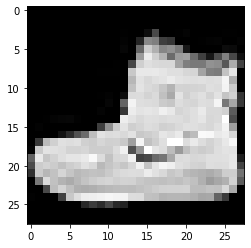

In [4]:
plt.imshow(train_images[0],cmap="gray")
print(train_labels[0])

In [5]:
#normalizing the images
train_images = train_images / 255.0
test_images = test_images /255.0

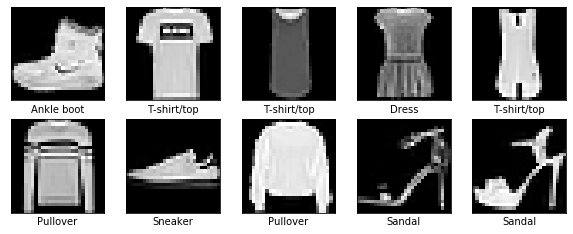

In [6]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap="gray")
    plt.xlabel(class_names[train_labels[i]])

In [7]:
input_layer = keras.layers.Flatten(input_shape=(28,28))
hidden_layer0 = keras.layers.Dense(units=128,activation=tf.nn.relu)
hidden_layer1 = keras.layers.Dense(units=128,activation=tf.nn.relu)
output_layer = keras.layers.Dense(units=10,activation=tf.nn.softmax)
model = keras.models.Sequential([input_layer,hidden_layer0,hidden_layer1,output_layer])

In [8]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(train_images,train_labels,epochs=6)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 3s 52us/sample - loss: 1.6727 - accuracy: 0.7936
Epoch 2/6
60000/60000 [==============================] - 3s 48us/sample - loss: 1.6263 - accuracy: 0.8349
Epoch 3/6
60000/60000 [==============================] - 3s 48us/sample - loss: 1.6140 - accuracy: 0.8470
Epoch 4/6
60000/60000 [==============================] - 3s 50us/sample - loss: 1.6073 - accuracy: 0.8534
Epoch 5/6
60000/60000 [==============================] - 3s 47us/sample - loss: 1.6032 - accuracy: 0.8573
Epoch 6/6
60000/60000 [==============================] - 3s 48us/sample - loss: 1.5999 - accuracy: 0.8611


In [11]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 34us/sample - loss: 1.6209 - accuracy: 0.8396


[1.620900838470459, 0.8396]

Seeing how predictions is working

In [12]:
predictions = model.predict(test_images)

9


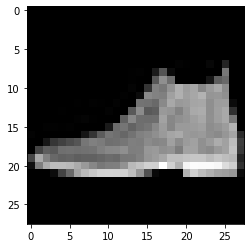

In [13]:
plt.imshow(test_images[0],cmap="gray")
print(np.argmax(predictions[0]))

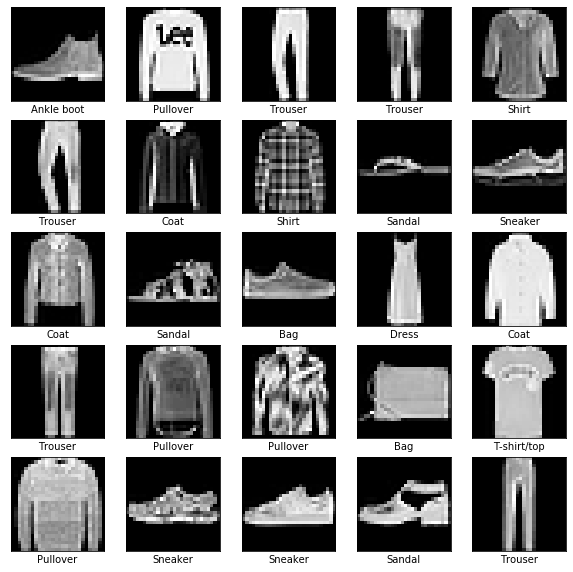

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i],cmap="gray")
    plt.xlabel(class_names[np.argmax(predictions[i])])